In [9]:
import optuna.integration.lightgbm as lgb
import lightgbm as lgb_o
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [10]:
p_df = pd.read_csv("./data/urshifu_pt.csv")
m_df = pd.read_csv("./data/m_urshifu.csv")
df = pd.merge(p_df,m_df,left_index=True,right_index=True)
df.columns

Index(['H', 'A', 'B', 'C', 'D', 'S', 'type0', 'type1', 'type2', 'type3',
       'type4', 'type5', 'type6', 'type7', 'type8', 'type9', 'type10',
       'type11', 'type12', 'type13', 'type14', 'type15', 'type16', 'type17',
       'label', 'type18', 'mtype0', 'mtype1', 'mtype2', 'mtype3', 'mtype4',
       'mtype5', 'mtype6', 'mtype7', 'mtype8', 'mtype9', 'mtype10', 'mtype11',
       'mtype12', 'mtype13', 'mtype14', 'mtype15', 'mtype16', 'mtype17', 'ph',
       'sp', 'sta'],
      dtype='object')

In [11]:
train_df,test_df = train_test_split(df,random_state=0)

In [12]:
train_x = train_df.drop("label",axis = 1)
train_y = train_df["label"]
test_x = test_df.drop("label",axis = 1)
test_y = test_df["label"]

In [13]:
lgb_train = lgb_o.Dataset(train_x, train_y)
lgb_eval = lgb_o.Dataset(test_x, test_y, reference=lgb_train)

In [14]:
params = {'objective': 'binary','metric': 'auc','verbosity': -1,"seed":0}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,verbose_eval=False, num_boost_round=1000, early_stopping_rounds=100)

[I 2022-01-26 17:44:44,851] A new study created in memory with name: no-name-cb8e3af9-cbe1-4a36-a73b-217320a03670
/home/yuuuuutaro/.cache/pypoetry/virtualenvs/urshifu-uBlELXII-py3.8/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/yuuuuutaro/.cache/pypoetry/virtualenvs/urshifu-uBlELXII-py3.8/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-01-26 17:44:45,720] Trial 0 finished with value: 0.790491313

In [15]:
pred_y = model.predict(test_x, num_iteration=model.best_iteration)

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y)
auc = metrics.auc(fpr, tpr)
print(auc)

0.80917242667663


In [17]:
print('Best Params:', model.params)

Best Params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'seed': 0, 'feature_pre_filter': False, 'lambda_l1': 0.0008324588689486371, 'lambda_l2': 0.0014417904943808443, 'num_leaves': 31, 'feature_fraction': 1.0, 'bagging_fraction': 0.7575502275332174, 'bagging_freq': 5, 'min_child_samples': 20, 'num_iterations': 1000, 'early_stopping_round': 100}


In [18]:
model.save_model('./models/optunalgbm.txt')

In [19]:
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [20]:
print((np.array(pred_y)>0.5).astype("int64"))

[0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0]


[40 44 25 27 23 38 12  3 10  8 10  9  4 11 11 13 26  1 15  8 13 15 19 10
 17 32 51 27 31 29 25 29 39 38 26 39 23 29 36 36 43 40 40 32 11 43]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

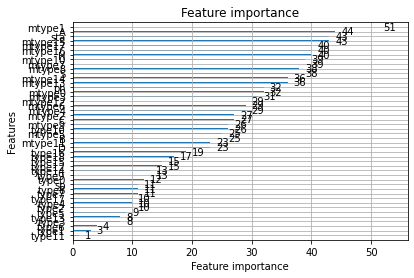

In [21]:
print(model.feature_importance())


# 特徴量の重要度をプロット
lgb.plot_importance(model)

In [22]:
from pokepoke import poke
poke_data = poke()

In [23]:
poke_data.poke_type

['ノーマル',
 'かくとう',
 'ひこう',
 'どく',
 'じめん',
 'いわ',
 'むし',
 'ゴースト',
 'はがね',
 'ほのお',
 'みず',
 'くさ',
 'でんき',
 'エスパー',
 'こおり',
 'ドラゴン',
 'あく',
 'フェアリー']